In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [295]:
train_input= pd.read_csv('Credit_Risk_Train_Data.csv')
validate_input= pd.read_csv('Credit_Risk_Validate_Data.csv')

In [296]:
print(train_input.columns)
print(validate_input.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'outcome'],
      dtype='object')


In [297]:
# the last column has a different name in both
# lets make the names same. and then merge them together
#so that we can fill the missing values simulteneously
validate_input.rename(columns={'outcome':'Loan_Status'}, inplace=True)

In [298]:
data_all = pd.concat([train_input,validate_input],ignore_index=True)
data_all.shape

(981, 13)

In [299]:
data_all.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


### Exploratory Data Analysis(EDA)

#### Missing value Preprocessing

<AxesSubplot:>

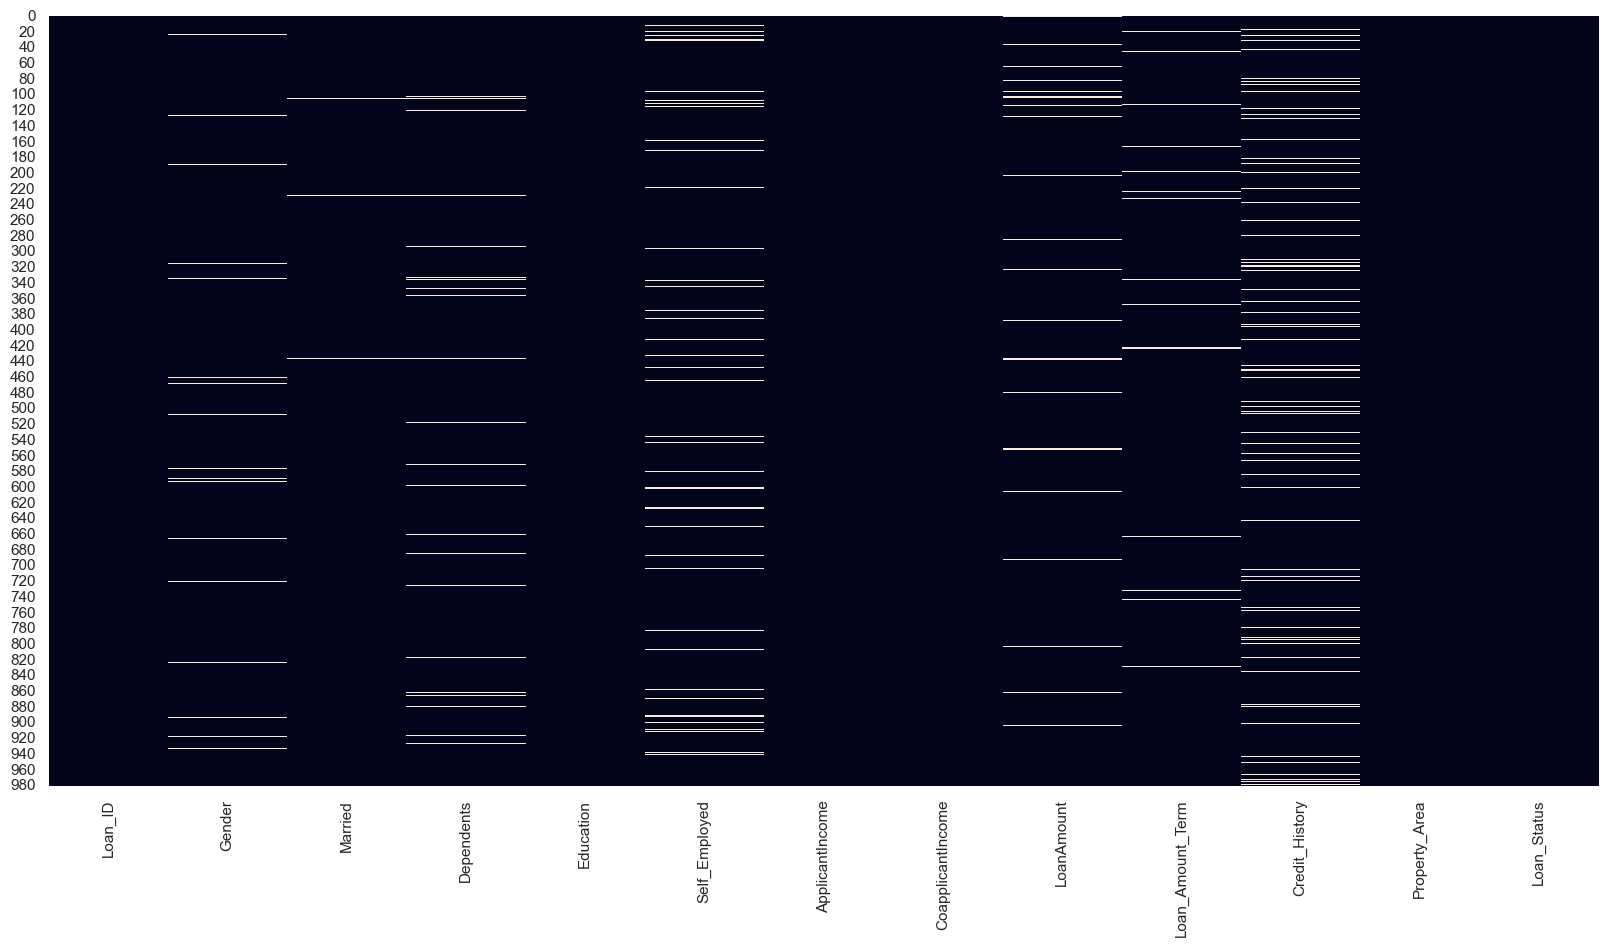

In [300]:
plt.figure(figsize=(20,10))
sns.heatmap(data_all.isnull(), cbar=False)

In [301]:
data_all.isnull().sum() #gives the missing value of all columns

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN Fill with Mode

In [302]:
Counter(data_all['Gender'])

Counter({'Male': 775, 'Female': 182, nan: 24})

In [303]:
data_all.fillna({'Gender':'Male'},inplace=True)

In [304]:
#check if filed
Counter(data_all["Gender"])

Counter({'Male': 799, 'Female': 182})

In [305]:
#lets fill Married now
print(Counter(data_all['Married'])) #most are married

Counter({'Yes': 631, 'No': 347, nan: 3})


In [306]:
data_all.fillna({'Married':'Yes'},inplace=True)

In [307]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN fill with Crosstab

In [308]:
Counter(data_all['Dependents'])

Counter({'0': 545, '1': 160, '2': 160, '3+': 91, nan: 25})

In [309]:
#lets see the Dependents with Marriage
pd.crosstab(data_all['Married'],data_all['Dependents'].isnull())

Dependents,False,True
Married,,
No,338,9
Yes,618,16


In [310]:
pd.crosstab(data_all['Dependents'],data_all['Married'])

Married,No,Yes
Dependents,,
0,276,269
1,36,124
2,14,146
3+,12,79


In [311]:
# for the bachlors , 
#lets fill the missing dependents as 0\#lets find the index of all rows with Dependents missing and Married No
bachelor_nulldependent = data_all[(data_all['Married']=='No')&
                                 (data_all['Dependents'].isnull())].index.tolist()
print(bachelor_nulldependent)

[293, 332, 355, 597, 684, 752, 879, 916, 926]


In [312]:
data_all['Dependents'].iloc[bachelor_nulldependent]='0'

In [313]:
Counter(data_all['Dependents'])

Counter({'0': 554, '1': 160, '2': 160, '3+': 91, nan: 16})

In [314]:
#for the remaining 16 missing dependents,
#lets see how many dependents Male & Female have
pd.crosstab(data_all['Gender'],data_all['Dependents'])

Dependents,0,1,2,3+
Gender,,,,
Female,127,32,13,9
Male,427,128,147,82


In [315]:
# lets see the gender of the 16 missing dependents
pd.crosstab(data_all['Gender'],data_all['Dependents'].isnull())

Dependents,False,True
Gender,,
Female,181,1
Male,784,15


In [316]:
pd.crosstab((data_all["Gender"]=='Male')&
           (data_all["Married"]=='Yes'),data_all['Dependents'])

Dependents,0,1,2,3+
row_0,,,,
False,318,48,23,15
True,236,112,137,76


In [317]:
# lets fill the dependents with 1
data_all['Dependents'].iloc[data_all[data_all['Dependents'].isnull()
                                    ].index.tolist()]='1'

In [318]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [319]:
Counter(data_all['Self_Employed'])

Counter({'No': 807, 'Yes': 119, nan: 55})

In [320]:
pd.crosstab(data_all['Married'],data_all['Self_Employed'].isnull())

Self_Employed,False,True
Married,,
No,326,21
Yes,600,34


In [321]:
pd.crosstab(data_all['Self_Employed'],data_all['Married'])

Married,No,Yes
Self_Employed,,
No,286,521
Yes,40,79


In [322]:
self_employed_null= data_all[(data_all['Married']=='No')&
                                 (data_all['Self_Employed'].isnull())].index.tolist()
print(self_employed_null)

[29, 95, 107, 114, 158, 268, 374, 385, 432, 463, 535, 542, 579, 600, 703, 775, 869, 873, 901, 911, 937]


In [323]:
data_all['Self_Employed'].iloc[self_employed_null]='No'

In [324]:
Counter(data_all['Self_Employed'])

Counter({'No': 828, 'Yes': 119, nan: 34})

In [325]:
pd.crosstab(data_all['Gender'],data_all['Self_Employed'])

Self_Employed,No,Yes
Gender,,
Female,160,19
Male,668,100


In [326]:
pd.crosstab(data_all['Gender'],data_all['Self_Employed'].isnull())

Self_Employed,False,True
Gender,,
Female,179,3
Male,768,31


In [327]:
pd.crosstab((data_all["Gender"]=='Male')&
           (data_all["Married"]=='Yes'),data_all['Self_Employed'])

Self_Employed,No,Yes
row_0,,
False,358,44
True,470,75


In [328]:
data_all['Self_Employed'].iloc[data_all[data_all['Self_Employed'].isnull()
                                    ].index.tolist()]='No'

In [329]:
 data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

#### NaN fill with Mean

In [330]:
# To check if any row with both LoanAmount and Loan_amount_term as NaN
pd.crosstab(data_all['LoanAmount'].isnull(),
           data_all['Loan_Amount_Term'].isnull())

Loan_Amount_Term,False,True
LoanAmount,,
False,934,20
True,27,0


In [331]:
pd.crosstab(data_all['LoanAmount'].isnull(),data_all['Loan_Amount_Term'])

Loan_Amount_Term,6.0,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,350.0,360.0,480.0
LoanAmount,,,,,,,,,,,,
False,1,2,3,3,7,4,64,7,20,1,800,22
True,0,0,0,0,0,0,2,1,0,0,23,1


In [332]:
data_all.groupby(data_all['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
6.0       95.000000
12.0     185.500000
36.0     117.666667
60.0     139.666667
84.0     121.142857
120.0     36.750000
180.0    131.125000
240.0    128.857143
300.0    166.250000
350.0    133.000000
360.0    144.420000
480.0    137.181818
Name: LoanAmount, dtype: float64

In [333]:
#lets fill the missing values in LoanAmount
#with the mean of the respective Loan_term
#we see that 180 & 240 has the almost same loan amount 128-131
#& 360 has high i.e 144
#so lets fill only 360 by 144
#and all remaining by 130
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
                      &(data_all['Loan_Amount_Term']==360)]=144
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())
                      &(data_all['Loan_Amount_Term']==480)]=137

In [334]:
data_all['LoanAmount'][(data_all['LoanAmount'].isnull())]=130

In [335]:
#lets fill Loan Amount Term
(data_all['Loan_Amount_Term']).value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
60.0       3
36.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [336]:
#lets fill the loan tenure by the mode i.e 360
data_all['Loan_Amount_Term'][data_all['Loan_Amount_Term'].isnull()]=360

In [337]:
data_all.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [338]:
data_all['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [339]:
data_all.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547235,-0.023823,0.023378
CoapplicantIncome,-0.114247,1.000000,0.178476,-0.042750,-0.027253
LoanAmount,0.547235,0.178476,1.000000,0.054260,-0.008206
Loan_Amount_Term,-0.023823,-0.042750,0.054260,1.000000,-0.023204
Credit_History,0.023378,-0.027253,-0.008206,-0.023204,1.000000


In [340]:
pd.crosstab(data_all['Gender'],data_all['Credit_History'])
# Gender makes no difference

Credit_History,0.0,1.0
Gender,,
Female,30,135
Male,118,619


In [341]:
#self_Employed makes no diffrence
pd.crosstab(data_all['Self_Employed'],data_all['Credit_History'])

Credit_History,0.0,1.0
Self_Employed,,
No,134,658
Yes,14,96


In [342]:
pd.crosstab(data_all['Education'],data_all['Credit_History'])

Credit_History,0.0,1.0
Education,,
Graduate,106,596
Not Graduate,42,158


In [343]:
pd.crosstab(data_all['Married'],data_all['Credit_History'])

Credit_History,0.0,1.0
Married,,
No,56,263
Yes,92,491


In [344]:
data_all.fillna({'Credit_History':1},inplace=True)

In [345]:
data_all.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Categorial Feature Engineering

In [346]:
data_all.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [347]:
data_all['Dependents'].value_counts()

0     554
1     176
2     160
3+     91
Name: Dependents, dtype: int64

In [348]:
#data_all['Dependents'][data_all['Dependents']=='3+']='3'
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: object

In [349]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [350]:
result = encoder.fit_transform(data_all['Dependents'])
print(result[1:10])

[1 0 0 0 2 0 3 2 1]


In [351]:
dependents = pd.Series(result)
dependents.value_counts()

0    554
1    176
2    160
3     91
dtype: int64

In [352]:
data_all['Dependents']= dependents

In [353]:
data_all['Dependents'].head()

0    0
1    1
2    0
3    0
4    0
Name: Dependents, dtype: int32

In [354]:
data_all_new= pd.get_dummies(data_all.drop(['Loan_ID'],axis=1),
                            drop_first=True)

In [355]:
data_all_new.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [356]:
X = data_all_new.drop(['Loan_Status_Y'],axis=1)
y=data_all_new['Loan_Status_Y']

In [357]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,144.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [358]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8

### Data Spliting

In [359]:
from sklearn.model_selection import train_test_split

In [360]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [361]:
X_train.shape

(735, 12)

In [362]:
X_test.shape

(246, 12)

### Feature Scaling

In [363]:
from sklearn.preprocessing import StandardScaler

In [364]:
scaler = StandardScaler()

In [365]:
#fit only to the training data
scaler.fit(X)

StandardScaler()

In [366]:
#now apply the transformation to the data :
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [367]:
X_train[:5]

array([[-0.76421042, -0.04616757, -0.5895062 , -0.1638335 ,  0.2705276 ,
        -2.37242036,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
        -0.74311183, -0.73158135],
       [-0.76421042,  0.11405164, -0.5895062 , -0.05900143,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
        -0.74311183, -0.73158135],
       [ 2.16045962, -0.41948537,  0.37428742,  0.37343085,  0.2705276 ,
         0.42151046,  0.47726799,  0.73980985,  1.87082869, -0.37155221,
         1.34569248, -0.73158135],
       [-0.76421042, -0.51804127,  0.43132752,  0.43895089,  0.2705276 ,
        -2.37242036,  0.47726799, -1.35169869, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199],
       [ 2.16045962, -0.31267256, -0.5895062 , -0.81903393, -3.45333917,
         0.42151046,  0.47726799,  0.73980985, -0.53452248, -0.37155221,
        -0.74311183,  1.36690199]])

### Training module using K-nn

In [368]:
from sklearn.model_selection import GridSearchCV

In [369]:
from sklearn.neighbors import KNeighborsClassifier

In [370]:
parameters = {'n_neighbors':[3,5,11,19],
             'weights': ['uniform','distance'],
             'metric': ['minkowski','manhattan']}

In [371]:
clf = GridSearchCV(KNeighborsClassifier(),parameters,cv=3,
                  verbose=1,n_jobs= -1)

In [372]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [373]:
clf.best_score_

0.8517006802721089

In [374]:
clf.best_params_

{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}

In [375]:
clf = KNeighborsClassifier(metric='minkowski', n_neighbors= 11,
                          weights='distance')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [376]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [377]:
confusion_matrix(y_test,y_pred)


array([[ 31,  30],
       [  3, 182]], dtype=int64)

In [378]:
accuracy_score(y_test,y_pred)

0.8658536585365854

In [379]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.51      0.65        61
           1       0.86      0.98      0.92       185

    accuracy                           0.87       246
   macro avg       0.89      0.75      0.78       246
weighted avg       0.87      0.87      0.85       246

